In [1]:
## Reference: https://towardsdatascience.com/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21

In [2]:
# !pip install gensim
# !pip pyLDAvis

In [3]:
import pandas as pd
from gensim import corpora
import pickle
import gensim
import ast
import pyLDAvis.gensim
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../Dataset/preprocessed_text.csv')
print(df.shape)
df.head()

(29210, 9)


,Unnamed: 0,tweet_text,timestamp,id,user,Party,hashtag,text,Segmented#
0,2998,🌞Reminder on this sunny day - if you’re taking...,2020-03-26 17:25:23,1.243228e+18,delaware_gov,0,[],"['reminder', 'sunny', 'day', 'taking', 'kid', ...",NaN
1,19729,"🎥 In one hour, I'll hold a virtual press confe...",2020-03-31 17:30:25,1.245041e+18,GovHolcomb,1,['COVID19'],"['one', 'hour', 'ill', 'hold', 'virtual', 'pre...",covid 19
2,3075,RT @CDCgov: Practice social distancing by putt...,2020-03-18 11:41:14,1.240242e+18,delaware_gov,0,[],"['practice', 'social', 'distancing', 'putting'...",NaN
3,28816,"Earlier today, I wrote to @POTUS asking him to...",2020-03-27 22:40:51,1.243669e+18,GovPhilScott,1,[],"['earlier', 'today', 'wrote', 'asking', 'invok...",NaN
4,6507,We have created a website to mobilize healthca...,2020-03-28 23:14:20,1.244040e+18,LouisianaGov,0,[],"['created', 'website', 'mobilize', 'healthcare...",NaN


In [5]:
text_data = list(df['text'].apply(ast.literal_eval))

In [6]:
# dictionary = corpora.Dictionary(text_data)
# corpus = [dictionary.doc2bow(text) for text in text_data]
# pickle.dump(corpus, open('corpus.pkl', 'wb'))
# dictionary.save('dictionary.gensim')

In [7]:
# NUM_TOPICS = 5
# ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
# ldamodel.save('model5.gensim')


In [8]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')
topics = lda.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.020*"spread" + 0.014*"take" + 0.010*"together" + 0.010*"u"')
(1, '0.016*"state" + 0.013*"day" + 0.011*"make" + 0.010*"great"')
(2, '0.035*"update" + 0.029*"today" + 0.026*"live" + 0.026*"covid"')
(3, '0.018*"home" + 0.016*"stay" + 0.015*"case" + 0.013*"thank"')
(4, '0.015*"business" + 0.014*"school" + 0.014*"today" + 0.013*"order"')


In [9]:
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [10]:
# topic_dist = map(lda.get_document_topics, corpus)
# topic_distribution = list(topic_dist)
# topic_dicts = [dict(i) for i in topic_distribution]
# dist_df = pd.DataFrame.from_dict(topic_dicts, orient = 'columns')
# dist_df['Party'] = df['Party']
# dist_df.rename(columns={0:'Topic 1', 1:'Topic 2', 2:'Topic 3', 3:'Topic 4', 4:'Topic 5'}, inplace=True)
# dist_df['Most Likely Topic'] = dist_df[['Topic 1','Topic 2','Topic 3','Topic 4','Topic 5']].idxmax(axis = 1)

In [11]:
# dist_df.to_pickle('TopicDistribution.pkl')
# dist_df.to_csv('TopicDistribution.csv')

In [12]:
dist_df = pd.read_pickle('TopicDistribution.pkl')
dist_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Party,Most Likely Topic
0,0.120164,0.833233,0.015519,0.015476,0.015609,0,Topic 2
1,0.015833,0.015858,0.937209,0.015683,0.015417,1,Topic 3
2,0.015518,0.015486,0.015386,0.938198,0.015412,0,Topic 4
3,0.015898,0.015995,0.016135,0.588116,0.363856,1,Topic 4
4,0.391231,0.148820,0.018333,0.136549,0.305067,0,Topic 1
...,...,...,...,...,...,...,...
29205,0.018228,0.018922,0.577520,0.018300,0.367031,0,Topic 3
29206,0.018242,0.639690,0.018261,0.018443,0.305363,1,Topic 2
29207,0.013378,0.013358,0.451003,0.226514,0.295747,0,Topic 3
29208,0.022856,0.146342,0.785107,0.022442,0.023253,1,Topic 3


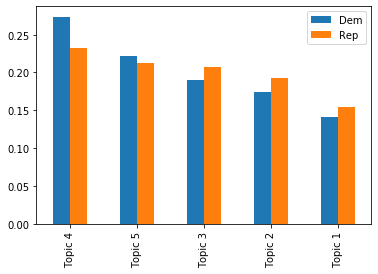

In [13]:
rep_dist = dist_df[dist_df['Party'] == 1]['Most Likely Topic'].value_counts(normalize = True)
dem_dist = dist_df[dist_df['Party'] == 0]['Most Likely Topic'].value_counts(normalize = True)
party_dist = pd.DataFrame({'Dem': dem_dist, 'Rep': rep_dist})

party_dist.plot(kind = 'bar')

In [11]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))

# ldamodel = gensim.models.ldamodel.LdaModel(corpus, id2word=dictionary, passes=15)
# ldamodel.save('modeln.gensim')

lda = gensim.models.ldamodel.LdaModel.load('modeln.gensim')
topics = lda.print_topics(num_words=5)
for topic in topics:
    print(topic)

(72, '0.167*"announced" + 0.120*"official" + 0.115*"today" + 0.094*"additional" + 0.069*"state"')
(82, '0.203*"join" + 0.199*"pm" + 0.136*"today" + 0.037*"hosting" + 0.032*"pleased"')
(57, '0.181*"yesterday" + 0.127*"office" + 0.096*"since" + 0.082*"special" + 0.077*"store"')
(33, '0.108*"report" + 0.086*"stand" + 0.072*"fighting" + 0.069*"rural" + 0.068*"frontline"')
(77, '0.105*"big" + 0.091*"change" + 0.072*"everything" + 0.068*"america" + 0.061*"anyone"')
(50, '0.077*"ready" + 0.077*"risk" + 0.075*"respond" + 0.066*"senior" + 0.060*"citizen"')
(44, '0.221*"press" + 0.165*"conference" + 0.103*"hoosier" + 0.077*"american" + 0.059*"difficult"')
(59, '0.110*"begin" + 0.085*"capitol" + 0.079*"issue" + 0.060*"visiting" + 0.048*"cte"')
(13, '0.228*"business" + 0.188*"working" + 0.101*"go" + 0.082*"small" + 0.061*"hard"')
(93, '0.171*"job" + 0.153*"dr" + 0.093*"economy" + 0.077*"keeping" + 0.048*"matter"')
(8, '0.245*"stay" + 0.232*"home" + 0.110*"proud" + 0.060*"ensure" + 0.045*"k"')
(85,

In [12]:
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [30]:
# topic_dist = map(lda.get_document_topics, corpus)
# topic_distribution = list(topic_dist)
# topic_dicts = [dict(i) for i in topic_distribution]
# dist_df = pd.DataFrame.from_dict(topic_dicts, orient = 'columns')
# dist_df['Party'] = df['Party']

# col_names = {}
# for i in range(lda.num_topics):
#     name = 'Topic '+str(i+1)
#     col_names[i] = name

# dist_df.rename(columns=col_names, inplace=True)
# dist_df['Most Likely Topic'] = dist_df[list(col_names.values())].idxmax(axis = 1)

# dist_df.to_pickle('TopicDistribution_ntopics.pkl')
# dist_df.to_csv('TopicDistribution_ntopics.csv')


In [57]:
dist_df = pd.read_pickle('TopicDistribution_ntopics.pkl')
dist_df['Most Likely Topic']

0         Topic 33
1         Topic 85
2        Topic 100
3          Topic 1
4         Topic 49
           ...    
29205     Topic 47
29206     Topic 97
29207     Topic 15
29208     Topic 85
29209     Topic 67
Name: Most Likely Topic, Length: 29210, dtype: object


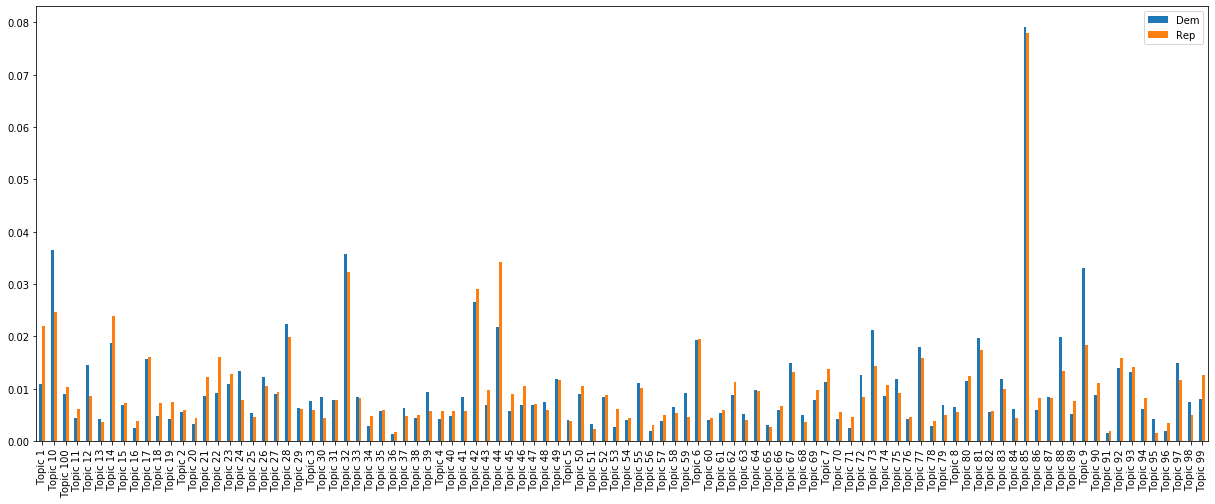

In [43]:
rep_dist = dist_df[dist_df['Party'] == 1]['Most Likely Topic'].value_counts(normalize = True)
dem_dist = dist_df[dist_df['Party'] == 0]['Most Likely Topic'].value_counts(normalize = True)
party_dist = pd.DataFrame({'Dem': dem_dist, 'Rep': rep_dist})

party_dist.plot(kind = 'bar', figsize = (21,8))

In [45]:
lda.show_topic(85, topn = 15) #Common for both

[('state', 0.17842214),
 ('address', 0.14840768),
 ('fund', 0.08838747),
 ('date', 0.066508695),
 ('stepping', 0.06310822),
 ('water', 0.044665985),
 ('least', 0.042944163),
 ('affordable', 0.024612147),
 ('delivering', 0.024181882),
 ('item', 0.022974588),
 ('responding', 0.021823531),
 ('car', 0.021541465),
 ('trust', 0.01810453),
 ('roundtable', 0.016688833),
 ('newly', 0.015445901)]

In [52]:
#More Republican
print('Topic 44:')
lda.show_topic(44, topn = 15)

Topic 44:


[('press', 0.22095363),
 ('conference', 0.16492815),
 ('hoosier', 0.10338049),
 ('american', 0.07707475),
 ('difficult', 0.05858419),
 ('today', 0.056537077),
 ('spoke', 0.0447631),
 ('continued', 0.03198302),
 ('success', 0.028090145),
 ('importance', 0.026383564),
 ('path', 0.021248724),
 ('nonprofit', 0.019415509),
 ('commercial', 0.010198767),
 ('technical', 0.009410574),
 ('anthony', 0.009191456)]

In [50]:
print("Topic 1:")
lda.show_topic(1, topn = 15)

Topic 1


[('food', 0.16656284),
 ('find', 0.110204056),
 ('remain', 0.09453009),
 ('getting', 0.09330816),
 ('bank', 0.04619928),
 ('talking', 0.04450062),
 ('fear', 0.032417353),
 ('thinking', 0.023749031),
 ('shield', 0.02326637),
 ('ence', 0.02303126),
 ('newest', 0.01612168),
 ('hotel', 0.01605167),
 ('near', 0.015429153),
 ('infection', 0.015332098),
 ('vigilant', 0.014133964)]

In [54]:
print("Topic 9:")
lda.show_topic(9, topn = 15) #More Democrat

Topic 9:


[('case', 0.1987319),
 ('positive', 0.11183229),
 ('new', 0.0815031),
 ('covid', 0.060703553),
 ('confirmed', 0.058394037),
 ('look', 0.055156913),
 ('total', 0.054881096),
 ('update', 0.0432072),
 ('bringing', 0.03640692),
 ('ha', 0.032908507),
 ('number', 0.03157734),
 ('today', 0.02942076),
 ('claim', 0.020057289),
 ('reported', 0.018419776),
 ('presumptive', 0.018228112)]

In [55]:
print("Topic 10:")
lda.show_topic(10, topn = 15) #More Democrat

Topic 10:


[('weather', 0.10475137),
 ('severe', 0.08052651),
 ('state', 0.07155386),
 ('large', 0.063757695),
 ('park', 0.055205945),
 ('among', 0.039854337),
 ('stopped', 0.03551888),
 ('visitor', 0.03381637),
 ('tha', 0.03065182),
 ('isnt', 0.029707098),
 ('association', 0.025694426),
 ('technology', 0.022744909),
 ('catch', 0.022584496),
 ('union', 0.022360912),
 ('kind', 0.021260735)]